In [123]:
import pandas as pd
import numpy  as np
import random
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, f1_score, roc_auc_score

1) Загрузите данные о вероятности развития сердечного приступа. 

In [124]:
#col_names = ['Age', 'Sex', 'ChestPain Type', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
heart = pd.read_csv('heart.csv')
pain_types = heart.ChestPainType.unique()
resting = heart.RestingECG.unique()
slope = heart.ST_Slope.unique()
sex = heart.Sex.unique()
exercise = heart.ExerciseAngina.unique()
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [125]:
"А теперь переводим все в числа!"

for i in range(len(pain_types)):
  heart.ChestPainType = heart.ChestPainType.replace(pain_types[i], i)

for i in  range(len(resting)):
  heart.RestingECG = heart.RestingECG.replace(resting[i], i)

for i in range(len(slope)):
  heart.ST_Slope = heart.ST_Slope.replace(slope[i], i)

for i in range(len(sex)):
  heart.Sex = heart.Sex.replace(sex[i], i)

for i in range(len(exercise)):
  heart.ExerciseAngina = heart.ExerciseAngina.replace(exercise[i], i)

heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [126]:
y = heart.HeartDisease
x = heart.drop(['HeartDisease'], axis=1)
print(y.head(3))
print(x.head(3))

0    0
1    1
2    0
Name: HeartDisease, dtype: int64
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              0        140          289          0           0   
1   49    1              1        160          180          0           0   
2   37    0              0        130          283          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0    172               0      0.0         0  
1    156               0      1.0         1  
2     98               0      0.0         0  


2) Разделите данные на обучающую и тестовую выборки в соотношении 80% / 20% без перемешивания.

In [127]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

y_train

0      0
1      1
2      0
3      1
4      0
      ..
729    0
730    0
731    1
732    1
733    0
Name: HeartDisease, Length: 734, dtype: int64

#3 Постройте следующие модели классификации:

In [128]:
#1 случайное предсказание (подбрасывание кубика)
y_pred_cub = []

y_train_pred_cub = []

for i in range(len(y_test)):
  y_pred_cub.append(round(random.random()))

for i in range(len(y_train)):
  y_train_pred_cub.append(round(random.random()))

eqs = 0
for j in range(len(y_test)):
  if list(y_test)[j] == y_pred_cub[j]:
    eqs += 1

print(f'Всего данных: {len(y_test)}')
print(f'Верных предсказаний: {eqs}')
print(f'Не верных предсказаний: {len(y_test) - eqs}')


Всего данных: 184
Верных предсказаний: 103
Не верных предсказаний: 81


In [129]:
#2 Логистическая регрессия (LogisticRegression)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_train_pred_lr = model.predict(X_train)
y_pred_lr = model.predict(X_test)
y_pred_lr
print(f'Количество неверных предсказаний: {(y_test!=y_pred_lr).sum()}')
print(f'Количество верных предсказаний: {(y_test == y_pred_lr).sum()}')


Количество неверных предсказаний: 43
Количество верных предсказаний: 141


In [130]:
#3(4) Метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)

"""
Ну тут модель смотрит на дискриминанты данных и по ним предсказывает значения следующих точек.
На самом деле в чистом виде её редко используют *так много где написано и приводится граффик на котором видно,
что данный метод с модификаторами достаточно стабилен и точен. Но насколько стоит им верить - решать каждому самому.
"""

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred_ld = model.predict(X_test)
y_train_pred_ld = model.predict(X_train)
y_pred_ld
print(f'Количество неверных предсказаний: {(y_test!=y_pred_ld).sum()}')
print(f'Количество верных предсказаний: {(y_test == y_pred_ld).sum()}')


Количество неверных предсказаний: 40
Количество верных предсказаний: 144


In [131]:
#4(5) Метод ближайших соседей (KNeighboursClassifier)
"""
Данный метод смотрит на ближайшие соседние значения и основываясь на них предсказывает занчение следующей точки.
В данном случае смотрит на ближайшие 5 (По дефолту стоят 5 соседей) соседей.
"""
model = KNeighborsClassifier(n_neighbors=7)# поменял на 7 соседей. Стало лучше, но придется облосновать причину 7 соседей, а не дефолтных 5)
model.fit(X_train, y_train)
y_pred_KNC = model.predict(X_test)
y_train_pred_KNC = model.predict(X_train)
y_pred_KNC
print(f'Количество неверных предсказаний: {(y_test!=y_pred_KNC).sum()}')
print(f'Количество верных предсказаний: {(y_test == y_pred_KNC).sum()}')


Количество неверных предсказаний: 65
Количество верных предсказаний: 119


4) На основе метрики  accuracy  сделайте вывод о недообученности-переобученности модели логистической регрессии. Для этого сделайте предсказание на тренировочном датасете и посчитайте accuracy на нём, затем на тестовом датасете и тоже посчитайте accuracy. Сравните эти значения, они должны быть примерно одинаковыми. Если точность на обучающей выборке оказывается сильно выше - это означает, что модель переобучилась.

In [132]:
print(f'\033[33mДостоверность для случайных предсказаний: {metrics.accuracy_score(y_test, y_pred_cub)}')
print(f'Достоверность для случайных предсказаний (тренировочный): {metrics.accuracy_score(y_train, y_train_pred_cub)}')
print(f'Точность для случайных предсказаний: {metrics.precision_score(y_true=y_test, y_pred=y_pred_cub, average="weighted")}')
print(f'Полнота для случайных предсказаний: {metrics.recall_score(y_test, y_pred_cub, average="weighted")}\n')

print(f'\033[32mДостоверность для линейной регрессии: {metrics.accuracy_score(y_test, y_pred_lr)}')
print(f'Достоверность для линейной регрессии (тренировочный): {metrics.accuracy_score(y_train, y_train_pred_lr)}')
print(f'Точность для линейной регрессии: {metrics.precision_score(y_true=y_test, y_pred=y_pred_lr, average="weighted")}')
print(f'Полнота для линейной регрессии: {metrics.recall_score(y_test, y_pred_lr, average="weighted")}\n')

print(f'\033[35mДостоверность для метода линейного дискриминантного анализа: {metrics.accuracy_score(y_test, y_pred_ld)}')
print(f'Достоверность для метода линейного дискриминантного анализа (тренировочный): {metrics.accuracy_score(y_train, y_train_pred_ld)}')
print(f'Точность для метода линейного дискриминантного анализа: {metrics.precision_score(y_true=y_test, y_pred=y_pred_ld, average="weighted")}')
print(f'Полнота для метода линейного дискриминантного анализа: {metrics.recall_score(y_test, y_pred_ld, average="weighted")}\n')

print(f'\033[36mДостоверность для метода ближайших соседей: {metrics.accuracy_score(y_test, y_pred_KNC)}')
print(f'Достоверность для метода ближайших соседей (тренировочный): {metrics.accuracy_score(y_train, y_train_pred_KNC)}')
print(f'Точность для метода ближайших соседей: {metrics.precision_score(y_true=y_test, y_pred=y_pred_KNC, average="weighted")}')
print(f'Полнота для метода ближайших соседей: {metrics.recall_score(y_test, y_pred_KNC, average="weighted")}')

print('\033[0m')

Достоверность для случайных предсказаний: 0.5597826086956522
Достоверность для случайных предсказаний (тренировочный): 0.47275204359673023
Точность для случайных предсказаний: 0.5607834314658164
Полнота для случайных предсказаний: 0.5597826086956522

Достоверность для линейной регрессии: 0.7663043478260869
Достоверность для линейной регрессии (тренировочный): 0.8787465940054496
Точность для линейной регрессии: 0.7665020582492259
Полнота для линейной регрессии: 0.7663043478260869

Достоверность для метода линейного дискриминантного анализа: 0.782608695652174
Достоверность для метода линейного дискриминантного анализа (тренировочный): 0.8814713896457765
Точность для метода линейного дискриминантного анализа: 0.782432712215321
Полнота для метода линейного дискриминантного анализа: 0.782608695652174

Достоверность для метода ближайших соседей: 0.6467391304347826
Достоверность для метода ближайших соседей (тренировочный): 0.7901907356948229
Точность для метода ближайших соседей: 0.648359373

5) Сделайте вывод о применимости каждой модели на основе метрики  F1-score (чем выше её значение, тем модель эффективнее).

In [133]:
f1_score_cub = f1_score(y_test, y_pred_cub)
print(f'Метрика f1 для случайного предсказания: {f1_score_cub}')

Метрика f1 для случайного предсказания: 0.5371428571428571


In [134]:
f1_score_lr = f1_score(y_test, y_pred_lr)
print(f'Метрика f1 для линейной регрессии: {f1_score_lr}')

Метрика f1 для линейной регрессии: 0.7514450867052023


In [135]:
f1_score_ld = f1_score(y_test, y_pred_ld)
print(f'Метрика f1 для метода линейного дискреминантного анализа: {f1_score_ld}')

Метрика f1 для метода линейного дискреминантного анализа: 0.7647058823529412


In [136]:
f1_score_KNC = f1_score(y_test,  y_pred_KNC)
print(f'Метрика f1 для метода ближайших соседей: {f1_score_KNC}')

Метрика f1 для метода ближайших соседей: 0.5751633986928104


6) На одном графике постройте ROC-кривые для каждой модели. Визуально определите самую эффективную и наименее пригодную модели. Чем ROC-кривая выше, тем модель более эффективна.

In [137]:
fpr_cub, tpr_cub, treshold_cub = roc_curve(y_test, y_pred_cub)
roc_auc_cub = auc(fpr_cub, tpr_cub)
roc_auc_cub

0.5589700996677741

In [138]:
fpr_lr, tpr_lr, treshold_lr = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lr

0.7656620787850024

In [139]:
fpr_ld, tpr_ld, treshold_ld = roc_curve(y_test, y_pred_ld)
roc_auc_ld = auc(fpr_ld, tpr_ld)
roc_auc_ld

0.7809682012339819

In [140]:
fpr_KNC, tpr_KNC, treshold_KNC = roc_curve(y_test, y_pred_KNC)
roc_auc_KNC = auc(fpr_KNC, tpr_KNC)
roc_auc_KNC

0.6384670147128618

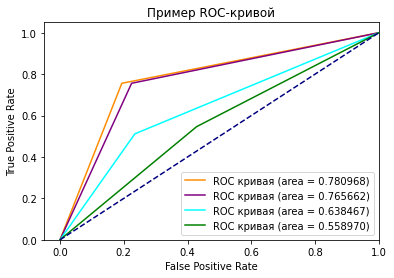

In [141]:
plt.plot(fpr_ld, tpr_ld, color='darkorange', label='ROC кривая (area = %0.6f)' % roc_auc_ld)
plt.plot(fpr_lr, tpr_lr, color='purple', label='ROC кривая (area = %0.6f)' % roc_auc_lr)
plt.plot(fpr_KNC, tpr_KNC, color='cyan', label='ROC кривая (area = %0.6f)' % roc_auc_KNC)
plt.plot(fpr_cub, tpr_cub, color='green', label='ROC кривая (area = %0.6f)' % roc_auc_cub)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

7) Выведите соответствующие значения AUC (площадь под ROC - кривой) и расположите модели в порядке пригодности.


In [144]:
roc_auc_ld = auc(fpr_ld, tpr_ld)
print(f'AUC для метода линейного дикреминантного анализа: {roc_auc_ld}')

AUC для метода линейного дикреминантного анализа: 0.7809682012339819


In [143]:
roc_auc_lr = auc(fpr_lr, tpr_lr)
print(f'AUC для линейной регресии: {roc_auc_lr}')

AUC для линейной регресии: 0.7656620787850024


In [145]:
roc_auc_KNC = auc(fpr_KNC, tpr_KNC)
print(f'AUC для метода ближайших соседей: {roc_auc_KNC}')

AUC для метода ближайших соседей: 0.6384670147128618


In [142]:
roc_auc_cub = auc(fpr_cub, tpr_cub)
print(f'AUC для случайного предсказания: {roc_auc_cub}')

AUC для случайного предсказания: 0.5589700996677741
